# PHYS 325 Scientific Computing -- Fall 2019

# 3. Simulations of physical systems

## 3.1 Random systems

Randomness in physical processes, e.g.
- radioactive decay
- quantum fluctuations
- Brownian motion (random for all practical purposes)

Randomness for numerical applications, e.g.
- Monte Carlo integration
- simulations with random conditions
- randomization of unknown variables

### 3.1.1 Random number generators (RNGs)

Generation of random numbers:
- based on a physically random process
    - truly random
    - slow
    - expensive
    
=> may be generated by [hardware](https://en.wikipedia.org/wiki/Hardware_random_number_generator), for example [quantum RNGs](https://www.idquantique.com/random-number-generation/products/quantis-random-number-generator/) or tabulated ahead of time (there are many websites that offer random numbers, for example [here](https://qrng.anu.edu.au/))
    
- pseudorandom numbers
    - should have the same statistical properties as truly random numbers
    - still have the option to reproduce any pseudorandom sequence by fixing the "seed"
    
 => numerical libraries

In [2]:
import numpy as np

# (uniformly) random number between 0 and 1
np.random.rand() 

0.7892846497804589

In [3]:
# can automatically generate arrays of numbers
np.random.rand(5,5) 

array([[0.89675326, 0.4436858 , 0.31479373, 0.88704567, 0.51759666],
       [0.4170006 , 0.52843453, 0.14680547, 0.23024894, 0.93723418],
       [0.31958436, 0.76994114, 0.45822358, 0.64463254, 0.66752443],
       [0.42318636, 0.70414026, 0.75845115, 0.34790276, 0.44165354],
       [0.99105848, 0.99501146, 0.3410173 , 0.19761853, 0.21594479]])

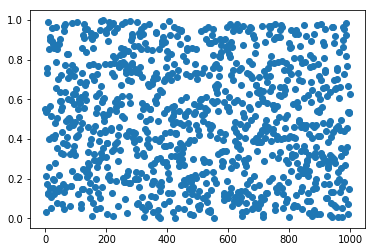

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.random.rand(1000), 'o')
plt.show()

How does this work?

Simplest method for pseudorandom numbers:

#### Linear congruential generators

generate a sequence of integers $I_1$, $I_2$, $I_3,\ldots$ between $0$ and $m-1$ by the recurrence relation

$$I_{j+1} = (aI_j + c)\ {\rm mod}\ m$$

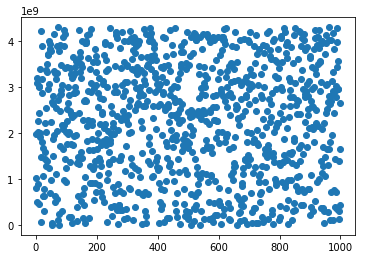

In [9]:
N = 1000
a = 1664525
c = 1013904223
m = 4294967296
x = 2              # initial value
results = []

for i in range(N):
    x = (a*x+c)%m
    results.append(x)
    
plt.plot(results,"o")
plt.show()

- the starting value $I_1$ (the seed) and the other parameters determine *the entire sequence*
- the sequence is periodic with period which is at most $m$ (depends on other parameters, too)
- the choice of $a$ and $c$ is not trivial
- the produced integers are $\leq m-1$ and can be transformed to floats $0\leq r<1$ by dividing by $m$
- this is often the "standard" type of RNG provided by a programming language
- however, for real simulations this RNG is usually **not sufficient**

> The best RNG to date for physics is the so-called **Mersenne twister**

You should always use this type of generator for actual calculations

=> implemented in many numerical libraries (and default in Python!)

In [6]:
# fix the random seed: any integer between 0 and 2**32 - 1 inclusive
np.random.seed(123456)
np.random.rand() 

0.12696983303810094

In [7]:
# leave the random seed random (uses some system parameter, such as exact time)
np.random.seed()
np.random.rand() 

0.8580091467020163

Good random number practices:

- always note the random seed (this allows you to reproduce your results for debugging)
- when running production code: use **different** and **large** integers for the seeds
- these should be read from a pre-generated list or produced with a program/script
- typically use parameter provided by operating system
     - derived from the system clock
     - number of CPU cycles since start-up
     - environmental noise, on Linux provided by [/dev/random](https://en.wikipedia.org/wiki//dev/random)
     - can also use the RNG itself to generate a list of seeds
- make sure the seed does not repeat in successive calculations!
- be careful with parallel code!

### 3.1.2 What is random?

- uniformly distributed (we will discuss non-uniform distributions later)
- uncorrelated/patternless
- should not repeat (within a very large time frame)

=> [statistical tests for RNGs](https://en.wikipedia.org/wiki/Randomness_tests)

- [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests), implemented for example [here](http://webhome.phy.duke.edu/~rgb/General/dieharder.php) with some additional tests
- [official battery of statistical tests by NIST](https://csrc.nist.gov/projects/random-bit-generation/)
- [TestU1](http://simul.iro.umontreal.ca/testu01/tu01.html) library of RNG tests, includes classical tests and several additional ones

#### Test of uniformity

Remember the section **Are two distributions different?** from the Data Analysis chapter

- bin the generated data
- all bins should contain about the same number $N_i$ of points
- quantitative estimate

$$\chi^2 = \sum_i\frac{(N_i-n_i)^2}{n_i}$$

  where in our case the comparison distribution $n_i$ is uniform => all $n_i$ are the same
- can use our usual goodness-of-fit measures

Quality considerations:

- the more random numbers you need, the better they have to be (avoid repetition)
- the fewer different functions use your random numbers, the better they have to be (avoid correlations)
- the higher the dimension of your system, the better your random numbers have to be (avoid correlations between dimensions)
- most RNGs will fail some of the randomness tests, but might still be good enough for your application

Ideally you should run your simulation with two different types of RNG...

### 3.1.3 Random number distributions

- most often we need *uniformly distributed* real numbers in some interval

In [10]:
import numpy as np

# uniformly random number between 0 and 1
print(np.random.rand())

# easy to extend to any other interval
start = 5
end = 17
interval = end-start
print(start + interval*np.random.rand())

#Use numpy distribution
print(np.random.uniform(5,17))

0.2255941966643228
11.26682798945464
9.650431227432392


In [16]:
# another typical example: specify probability of an event

def biasedCoin():
    if np.random.rand()<0.4:
        return 0               # corresponds to heads: here less likely
    else:
        return 1               # corresponds to tails: here more likely
    
biasedCoin()

1

- often we also need uniformly distributed *integers* between $0$ and $N-1$ (for example rolling a six-sided die, or a simple coin toss)

In [10]:
# uniformly random integer between 0 and 9
np.random.randint(10)

2

- but sometimes we need the numbers to be distributed according to a more complex distribution, typically
    - Gaussian distribution,
    - Poisson distribution,
    - Gamma distribution,
    - binomial distribution,
    - exponential distribution,...

See the [NumPy documentation](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) for a full list of available distributions

**Example:** Simulation of Gaussian errors (used to generate data for Homework 8, Exercise 2 on general linear least squares)

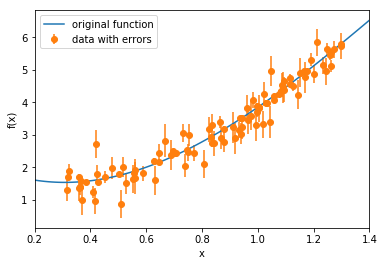

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# original function
def f(x):
    return 2.15 - 4.1*x + 7.4*x*x - 1.6*x*x*x

# generating the data points with errors
num_points = 100

# this generates uniformly random x-values between 0.3 and 1.3 (sort them in ascending order afterwards)
x = np.sort(np.random.rand(num_points)) + 0.3

# the size of the error bar is also uniformly random, between 0 and 0.5
errY = 0.5*np.random.rand(num_points)

# the y-values are normally distributed around mean f(x) with standard deviation errY
y = np.random.normal(f(x),errY)

x_for_plot = np.linspace(0.2, 1.4, num_points)
plt.xlim(0.2, 1.4)
plt.plot(x_for_plot,f(x_for_plot), label = "original function")
plt.errorbar(x, y, yerr = errY, fmt='o', label = "data with errors")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc = "upper left")
plt.show()

- sometimes we might also need a more complex distribution for which there is no library

How does one obtain non-uniformly distributed random numbers from a uniform distribution?

- transformation method
- rejection method

see for example "Numerical Recipes" chapter 7 and Newman's "Computational Physics" chapter 10

#### Transformation method

Assume we know how to generate uniform numbers (=> Mersenne twister!)

Uniform probability density:

$$p(x) = \left\{\begin{align} 1\ & {\rm for}\ 0<x<1\\0\ & {\rm otherwise} \end{align}\right.$$

Normalization:

$$\int_{-\infty}^\infty p(x)dx = 1$$

Now pick some function $y(x)$ => its distribution will be given by

$$|p(x)dx| = |p(y)dy| \Rightarrow p(y) = p(x)\left|\frac{dx}{dy}\right|$$

Example:

$$ y(x) = -\log(x)\Rightarrow x = \exp(-y) \Rightarrow p(y) = \left|\frac{dx}{dy}\right| = e^{-y} $$

if $p(x)$ is uniform => $p(y)$ is the *exponential distribution* 

Strategy:

- generate uniformly random numbers $x_i$
- calculate $y_i = -\log(x_i)$
- the $y_i$ will be exponentially distributed

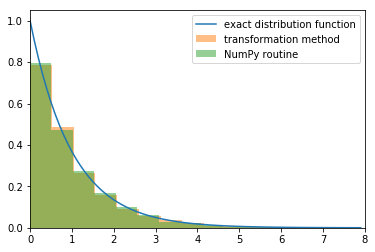

In [87]:
# analytical form for exponential distribution
def exp_distr(x):
    return np.exp(-x)

n = 10000

# generate numbers with the transformation method
uniform = np.random.rand(n)
uniform_transformed = -np.log(uniform)

# generate numbers with the NumPy routine
exp_direct = np.random.exponential(1, n)

# compare results
x = np.arange(0,8,0.1)
plt.plot(x, exp_distr(x), label = 'exact distribution function')
plt.hist(uniform_transformed, bins = 20, density = True,\
         alpha = 0.5, label = 'transformation method')
plt.hist(exp_direct, bins = 20, density = True,\
         alpha = 0.5, label = 'NumPy routine')
plt.legend()
plt.xlim(0,8)
plt.show()

Sometimes this is difficult/impossible because

- $p(x)$ is not know in analytic form
- transformation function might not exist in closed form

A method that always works (if $p(x)dx$ is known and computable):

#### Rejection method

Idea:

- draw a graph of the desired probability distribution $p(x)$
- the area under the curve in any range of $x$ corresponds to the probability of generating an $x$ in that range
- the $x$-value of a random point in 2d, with uniform probability in the area under your curve, has the desired distribution $p(x)$

How to choose this random point under the curve?

Naive method:

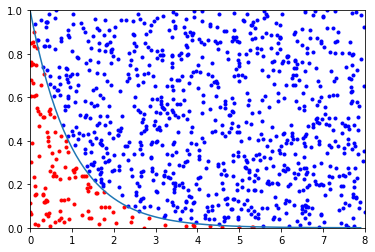

Success rate:  0.121


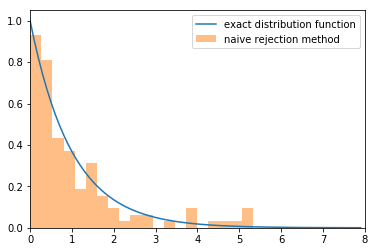

In [9]:
# as before, we want to generate random numbers according to the exponential distribution
def exp_distr(x):
    return np.exp(-x)

n = 1000
success = 0
naive_rejection = []

fig = plt.figure()
plt.xlim(0, 8)
plt.ylim(0, 1)

for i in range(n):

    # we start out generating uniform numbers in a 2D box containing the exponential distribution
    x_value = 8*np.random.rand()
    y_value = np.random.rand()
    # note that we had to cut off the x-values at some point 
    # this introduces an error, but at x=8 the exponential distribution is already very small
    # the y_values are always between 0 and 1 in this case
    
    # we then check if the point lies above or below the exponential distribution curve
    if y_value < exp_distr(x_value):
        plt.plot(x_value, y_value, 'r.')
        success += 1
        naive_rejection.append(x_value)
    else:
        # we reject all the points that lie above the distribution curve
        plt.plot(x_value, y_value, 'b.')

x = np.arange(0,8,0.1)
plt.plot(x, exp_distr(x))
plt.show()

# the x_values of the points that fall below the curve are indeed exponentially distributed
# this is because we are basically generating the histogram that we want directly
plt.plot(x, exp_distr(x), label = 'exact distribution function')
plt.hist(naive_rejection, bins = 20, density = True,\
         alpha = 0.5, label = 'naive rejection method')
plt.legend()
plt.xlim(0,8)
plt.show()

# unfortunately most numbers are above the curve and they are "wasted"
print("Success rate: ", success/n)

We have seen that this method definitely works, but how can it be made more efficient?

Idea 2:

> Instead of generating our random numbers in a rectangular box, we could choose a regular shape that more closely resembles the desired distribution

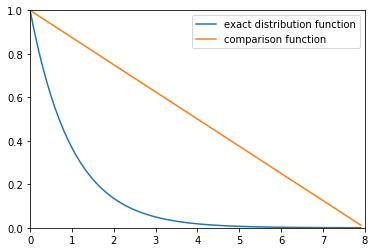

In [11]:
cutoff = 8

def comparison_fn(x):
    return 1 - x/cutoff

x = np.arange(0,cutoff,0.1)
plt.plot(x, exp_distr(x), label="exact distribution function")
plt.plot(x, comparison_fn(x), label="comparison function")
plt.xlim(0,cutoff)
plt.ylim(0,1)
plt.legend()
plt.show()

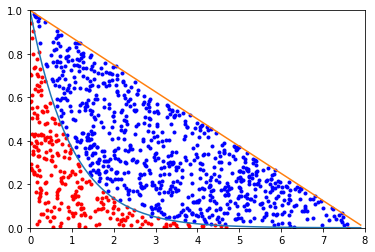

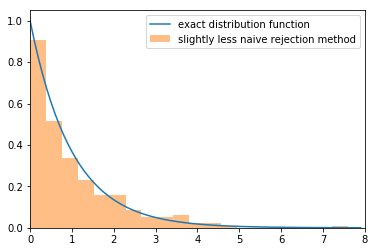

Success rate:  0.249


In [22]:
# we will now proceed similarly to before

n = 1000
success = 0
better_rejection = []

fig = plt.figure()
plt.xlim(0, cutoff)
plt.ylim(0, 1)

for i in range(n):

    # now we need uniform numbers in the triangle above our distribution
    # generating such numbers is non-trivial: http://mathworld.wolfram.com/TrianglePointPicking.html
    # we will use a Python library instead
    x_value = np.random.triangular(0, 0, cutoff, 1)[0]
    y_value = comparison_fn(x_value)*np.random.rand()
    # the y_value is chosen between zero and the diagonal line
    
    # we then check if the point lies above or below the exponential distribution curve
    if y_value < exp_distr(x_value):
        plt.plot(x_value, y_value, 'r.')
        success += 1
        better_rejection.append(x_value)
    else:
        # we reject all the points that lie above the distribution curve
        plt.plot(x_value, y_value, 'b.')

x = np.arange(0,cutoff,0.1)
plt.plot(x, exp_distr(x))
plt.plot(x,comparison_fn(x))
plt.show()

# the x_values of the points that fall below the curve are indeed exponentially distributed
# this is because we are basically generating the histogram that we want directly
plt.plot(x, exp_distr(x), label = 'exact distribution function')
plt.hist(better_rejection, bins = 20, density = True,\
         alpha = 0.5, label = 'slightly less naive rejection method')
plt.legend()
plt.xlim(0,cutoff)
plt.show()

# somewhat fewer numbers are above the curve and are "wasted"
print("Success rate: ", success/n)

This already works somewhat better!

General method:

![Rejection Method](images/rejectionmethod.png)
Image from Numerical Recipes

- select another simple function $f(x)$ => comparison function
     - it must enclose a finite area
     - it must lie above $p(x)$ everywhere
     - this is always possible for a probability distribution $p(x)$
     - make sure $f(x)$ is simple enough that you can easily integrate it
     - and that its indefinite integral is invertible
- choose a uniform random point $x_0$ in 2d under the comparison function $f(x)$
     - use a version of the transformation method
     - compute the indefinite integral $I(x_0) = \int_0^{x_0} f(x)dx$
     - pick a uniform point between $0$ and $A$, where $A$ is the total area under $f(x)$
     - invert the indefinite integral to get the corresponding $x_0$
     - pick another uniform point, $y_0$, this time between $0$ and $f(x_0)$
     - the point $(x_0, y_0)$ is uniformly distributed in the area under $f(x)$
- accept or reject the point
     - $x$ lies outside the area under the original $p(x)$ => reject and choose another $x$ 
     - $x$ lies inside the area under the original $p(x)$ => accept
     - the accepted points are uniform in the accepted area, so that their $x$-values have the desired distribution $p(x)$

Efficiency:

- the more points rejected the slower the method
- the comparison function should be as close as possible to $p(x)$

Example: general method

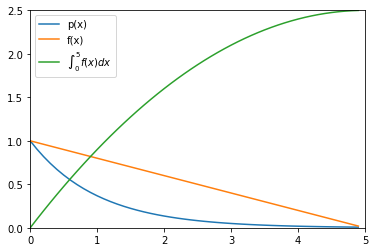

In [23]:
# plot of the exponential distribution, the linear comparison function, and the integral of the comparison function

cutoff = 5

def comparison_fn(x):
    return 1 - x/cutoff

def int_comparison_fn(x):
    return x - x**2/cutoff/2

x = np.arange(0,cutoff,0.1)
plt.plot(x, exp_distr(x), label="p(x)")
plt.plot(x, comparison_fn(x), label="f(x)")
plt.plot(x, int_comparison_fn(x), label=r"$\int_0^5 f(x)dx$")
plt.xlim(0,cutoff)
plt.ylim(0,cutoff/2)
plt.legend()
plt.show()

Average number of trials:  2.471
Success rate:  0.4046944556859571


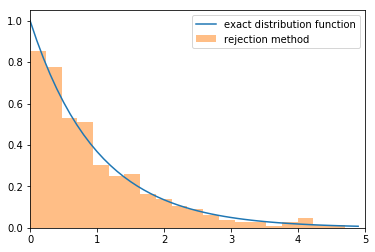

In [26]:
# implementation of the general rejection method
# for the exponential distribution and linear comparison function

counter = 0

def exp_rejection():
    global counter
    # repeat until acceptance
    accept = False
    x0 = 0
    while(accept == False):
        counter += 1
            
        # pick a random point between 0 and the full integral of f(x)
        randomI = int_comparison_fn(cutoff)*np.random.rand()

        # get the corresponding x0 value
        # in this case, because I = x - x**2/cutoff/2 we need to solve quadratic equation
        x0 = cutoff - np.sqrt(cutoff*cutoff-2*cutoff*randomI)

        # pick a random value between 0 and f(x0)
        y0 = comparison_fn(x0)*np.random.rand()

        # accept or reject
        if y0 < exp_distr(x0):
            accept = True
    return x0

rejection_data = []
for i in range(n):
    rejection_data = np.append(rejection_data, exp_rejection())

print("Average number of trials: ", counter/n)
print("Success rate: ", n/counter)
    
# compare results
plt.plot(x, exp_distr(x), label = 'exact distribution function')
plt.hist(rejection_data, bins = 20, density = True,\
        alpha = 0.5, label = 'rejection method')
plt.xlim(0,cutoff)
plt.legend()
plt.show()

### 3.1.4 Random walks and diffusion

- particles move in a medium 
- occasionally they collide and change direction
- we can approximate that this direction change is random

Examples:

- molecule moving through a solution
- cream spreading out in coffee
- photons escaping the interior of a star

1d walk sequence

In [91]:
# the choice function selects values from a list with a default equal probability
np.random.choice([-1,1], 100)

array([-1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1])

This random walk process is also known as **diffusion**

=> particles spreading out from some point

Positions of a large number of walkers all starting from the same position:

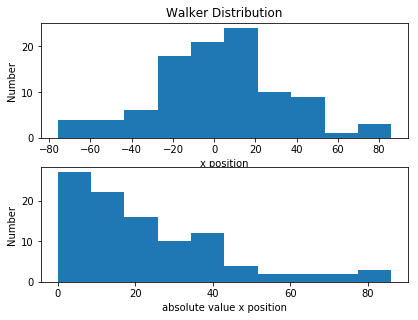

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

#the choice function selects values from a list with a default equal probability
steps = np.random.choice([-1,1], size=(1000,100))  

# the current position is the sum of all steps until the according time
pos = np.cumsum(steps,axis=0)

plt.subplot(2,1,1)
plt.hist(pos[-1,:])    
plt.title('Walker Distribution')
plt.xlabel('x position')
plt.ylabel('Number')

plt.subplot(2,1,2)
plt.hist(np.abs(pos[-1,:]))    
plt.xlabel('absolute value x position')
plt.ylabel('Number')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.4)

=> of course, the average position $\langle x \rangle$ must be zero

$$\langle x\rangle =\sum_{i=1}^{N}\vec{l}_i=0,$$

where $\vec{l}_i$ is the random step

Average distance squared:

$$\langle x^2\rangle= \left(\sum_{i=1}^{N}\vec{l}_i\right)\left(\sum_{j=1}^{N}\vec{l}_j\right)=\underbrace{\sum_{i=1}^{N}{\vec{l}_i}^2}_{\sum_{i=1}^{N}l^2} +\sum_{i=1}^{N}\sum_{j\ne i}\underbrace{\vec{l}_i\cdot\vec{l}_j}_{\pm l^2\ {\rm equally}\ {\rm probable}}= Nl^{2}$$

The number of steps $N$ is proportional to the time $t$:

$$\langle x^2\rangle\equiv Dt,$$

where $D$ is the **diffusion constant**

$$\sqrt{\langle x^2\rangle}=\sqrt{N} l=\sqrt{D}\sqrt{t}$$

=> the average net distance moved $\propto\sqrt{N}$ or $\propto\sqrt{t}$

- compare with a free particle: $\sqrt{\langle x^2\rangle}\propto t$
- the random walker escapes from the origin much more slowly

#### 2d random walk:

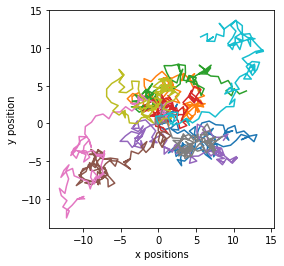

In [25]:
%matplotlib inline
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt

nwalkers=10
nsteps=100

steparr=nprand.rand(nwalkers,nsteps,2)-0.5  # all nwalk*nstep*ndim random numbers
xsteps=np.zeros((nwalkers,nsteps))          # cumulative x positions
ysteps=np.zeros((nwalkers,nsteps))          # cumulative y positions

for i in range(nwalkers):          # loop over walkers
    for j in range(1,nsteps):      # loop over steps all start at 0,0
        r=np.sqrt(steparr[i,j,0]**2 + steparr[i,j,1]**2)   # normalize step size to 1
        xsteps[i,j]=xsteps[i,j-1] + steparr[i,j,0]/r
        ysteps[i,j]=ysteps[i,j-1] + steparr[i,j,1]/r

for k in range(nwalkers):
    plt.plot(xsteps[k,:],ysteps[k,:])
    
plt.xlabel('x positions')
plt.ylabel('y position')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### Random walk simulation in 2d

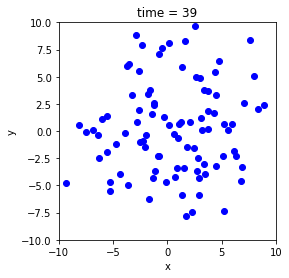

In [24]:
%matplotlib inline
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# this part is as before
# could also implement scattering of walls or periodic boundary conditions!
nwalkers=100
nsteps=40

steparr=nprand.rand(nwalkers,nsteps,2)-0.5  # all nwalk*nstep*ndim random numbers
xsteps=np.zeros((nwalkers,nsteps))          # cumulative x positions
ysteps=np.zeros((nwalkers,nsteps))          # cumulative y positions

for i in range(nwalkers):          # loop over walkers
    for j in range(1,nsteps):      # loop over steps all start at 0,0
        r=np.sqrt(steparr[i,j,0]**2 + steparr[i,j,1]**2)   # normalize step size to 1
        xsteps[i,j]=xsteps[i,j-1] + steparr[i,j,0]/r
        ysteps[i,j]=ysteps[i,j-1] + steparr[i,j,1]/r

# the following is an animation of the random walk  
fig = plt.figure()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')

def animate(i):
      
    if i > 0:
        plt.cla()
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        for k in range(nwalkers):
            plt.scatter(xsteps[k,i],ysteps[k,i],c='b')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('time = %d' %i)
    
simulation = animation.FuncAnimation(fig, animate, frames = nsteps, repeat = False)

from IPython.display import HTML
HTML(simulation.to_jshtml())

#### Self-avoiding walks

=> the walker must never overlap itself

e.g. long-chain polymers

- the self-avoiding walker escapes the origin more quickly than the non-restricted walker
- $\langle x^2\rangle\propto t^{1.4}$
- in a simulation, walker may get trapped due to constraints

### 3.1.5 Cluster growth

diffusion (or random walks) => particles spreading out

cluster growth              => particles clumping together

- growth of snowflakes
- growth of crystals
- useful also in medicine

#### Eden model

- cancer-like (clusters grow from within by expanding their borders)
- start with a nucleation center at the origin
- allow new sites on the boundary of old sites to be occupied
- keep track of which sites are occupied, which available for occupation, and which are stagnant
- more efficient than picking random points and testing whether or not they are occupiable

Algorithm

- default cell is stagnant (equal to -1)
- set the original position as filled (equal to 1)
- mark the open cells around this cell as fillable (equal to 0)
- randomly select a site from the fillable cells
- set them all to filled (make equal 1)
- set any cells around newly filled cells that were stagnant (-1) equal to fillable (0)
- repeat until desired number of sites filled

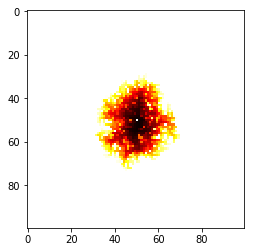

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#########################################

ncells = 1024  # number of sites to fill
nside = 100    # width of the grid

# create an array of index increments for use in populating sites
neighbors=np.array([
    (0, 1), 
    (0, -1), 
    (1, 0), 
    (-1, 0)
])

body = np.zeros((nside,nside))-1  # array holding the cell occupancy counter (-1 = empty; 0 = fillable; 1 = filled)
age = np.zeros((nside,nside))     # make an array that holds the step number for which the cell is occupied

ctr=int(nside/2)
body[ctr,ctr] = 1

# loop over neighbors, setting those sites = 0 (fillable)
for near in neighbors:
    body[ctr+near[0],ctr+near[1]] = 0

for i in range(ncells-1):                  # add the new sites
    gsites = np.where(body==0)             # find indices of available sites
    nget=np.random.choice(gsites[0].size)  # randomly select the gsite index
    curx=gsites[0][nget]                   # remember where returns a list of 1D array in this case
    cury=gsites[1][nget]
    body[curx,cury] = 1
    age[curx,cury]= ncells-i               # record the age for the filled site at the end of the run
    
    # fill=np.random.choice(gsites)
    for near in neighbors:    # now check the neighbors, and if -1 change to 0
        if body[curx+near[0],cury+near[1]] == -1:
            body[curx+near[0],cury+near[1]] = 0

# clean up the array at the end
unfilled=np.where(body == -1)  # find non-filled/non-candidate sites
body[unfilled] = 0             # set them equal to zero

plt.imshow(age,cmap=plt.cm.hot_r)
plt.show()  

#### Diffusion-limited aggregation (DLA)

- new particles are added *from outside* the cluster
- examples: snow flakes or soot particles